DSCI100 Final Project - Group 22

# Can Age and Experience Level Predict Hours Played in the Players Dataset?

By Vanessa Mah 76858182, Jeya Cheema 68791771, Xiaowen Hu 77277085 & Amy Huang 45064565


## (1) Introduction 

At the University of British Columbia, a Computer Science research group led by Dr. Frank Wood is studying how people play video games in realistic environments. To support this research, the team developed a custom Minecraft server called PLAICraft, which automatically records players' actions as they move through the virtual environment. These data allow researchers to study behaviour patterns, decision making, and skill development.

However, running this type of data collection project requires careful planning. Server performance, data storage capacity, and software infrastructure all come with financial costs and depend heavily on how many people join the server and how long they play. To manage resources responsibly, the research group needs to understand which kinds of players tend to contribute the most data so they can focus their recruitment efforts on those groups. This leads to the central question of the project: **Can age and experience predict hours played in the Players dataset?**

The dataset used to answer this question is the `players` dataset, which provides insights into a group of players, including their experience level, subscription status, hours played, name, gender, and age. A summary of the variables is shown below.

### Dataset Overview

The `players` dataset contains 196 observations and 7 variables. 

#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |

There are a few issues in the dataset that need to be addressed for more accurate analysis. In this case, we focus on three main problems:

- **Missing values**: The `Age` variable contains missing values for at least one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Misclassification of variables**: The `experience` variable should be converted to a factor because it represents categorical data, but it is currently stored as a character.
  
#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.




## (2) Methods & Results 

To answer our specific question, we only used the `Age`, `experience`, and `played_hours` variables from the `players` dataset to predict player engagement.

- We used KNN regression to explore the relationship between `Age` and `played_hours`.

- We used KNN classification to explore the relationship between `experience` and `played_hours`.

We began by installing and loading the required packages for data manipulation.

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `players.csv` dataset file was loaded into R using the `read.csv()` function.

In [14]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100-group-project/refs/heads/main/players.csv"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


We also performed summary statistics for the variables we are interested in.

In [23]:
Summary_players <- list(
    columns_count = ncol(players),
    observations_count = nrow(players),
    column_names = names(players),
    AGE = list(
        Quartiles = quantile(players$Age, na.rm = TRUE),
        NA_count = sum(is.na(players$Age)),
        Max = max(players$Age, na.rm = TRUE),
        Min = min(players$Age, na.rm = TRUE),
        Mean = mean(players$Age, na.rm = TRUE),
        Median = median(players$Age, na.rm = TRUE),
        Standard_Deviation = sd(players$Age, na.rm = TRUE),
        Range = range(players$Age, na.rm = TRUE)),
    Played_Hours = list(
        Quartiles = quantile(players$played_hours),
        NA_count = sum(is.na(players$played_hours)),
        Max = max(players$played_hours),
        Min = min(players$played_hours),
        Mean = mean(players$played_hours),
        Median = median(players$played_hours),
        Standard_Deviation = sd(players$played_hours),
        Range = range(players$played_hours)))

experience_table <- table(players$experience)
experience_percentages <- prop.table(experience_table) * 100

Experience <- list(
    Experience_Frequency = experience_table,
    Experience_Percentages = experience_percentages)

Summary_players
Experience

$columns_count
[1] 7

$observations_count
[1] 196

$column_names
[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"         

$AGE
$AGE$Quartiles
   0%   25%   50%   75%  100% 
 9.00 17.00 19.00 22.75 58.00 

$AGE$NA_count
[1] 2

$AGE$Max
[1] 58

$AGE$Min
[1] 9

$AGE$Mean
[1] 21.13918

$AGE$Median
[1] 19

$AGE$Standard_Deviation
[1] 7.389687

$AGE$Range
[1]  9 58


$Played_Hours
$Played_Hours$Quartiles
   0%   25%   50%   75%  100% 
  0.0   0.0   0.1   0.6 223.1 

$Played_Hours$NA_count
[1] 0

$Played_Hours$Max
[1] 223.1

$Played_Hours$Min
[1] 0

$Played_Hours$Mean
[1] 5.845918

$Played_Hours$Median
[1] 0.1

$Played_Hours$Standard_Deviation
[1] 28.35734

$Played_Hours$Range
[1]   0.0 223.1

$Experience_Frequency

 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

$Experience_Percentages

  Amateur  Beginner       Pro   Regular   Veteran 
32.142857 17.857143  7.142857 18.367347 24.489796 


Summary Statistics Results (described in words):
- The dataset includes players aged between 9 and 58 years, with an average age of 21.14 years, a median of 19 years, and a standard deviation of 7.39. The age quartiles are 17 (Q1), 19 (Q2), and 22.75 (Q3). There are also 2 missing values in the `age` column.

- The total hours played vary widely from 0 to 223.1 hours, with a mean of 5.85 hours, a median of 0.1 hours, and a standard deviation of 28.36.

- The majority of players are at the Amateur level (32.14%), followed by Veterans (24.49%), Regulars (18.37%), and Beginners (17.86%).

Before beginning the analysis, a few formatting steps were required:
- Converted `experience` variable into a factor so R treats it as a categorical variable
- Removed the missing values in `Age` 

In [27]:
players_clean <- players |>
  filter(!is.na(Age)) |>
  mutate(experience = as.factor(experience))
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Minimal wrangling was also applied to the dataset to transform it into a tidy format.

In [29]:
players_tidy <- players_clean |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age))    # age was converted to an integer to ensure whole numbers
head(players_tidy)

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0


## (2.1) Predicting a player’s total hours played using their age

To investigate if the player's age can predict the total hours played by the player, we used the KNN regression method.

Firstly, we created a visualization of `Age` and `played_hours`. A scatter plot was used to explore the relationship between age and hours played, with `Age` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends. Data points are colour-coded by players' experience level.

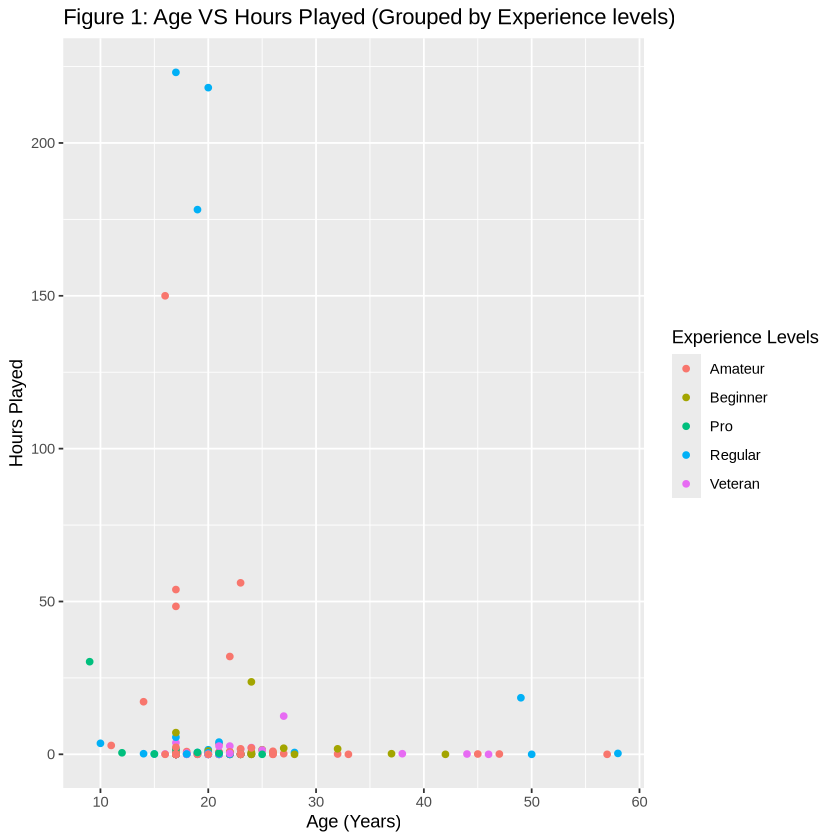

In [62]:
players_age <- players_tidy |>
  ggplot(aes(x=Age, y=played_hours, color=experience)) +
  geom_point() +
  labs(title = "Figure 1: Age VS Hours Played (Grouped by Experience levels)",
        color = "Experience Levels",
        x = "Age (Years)",
        y = "Hours Played" )
players_age

Figure 1 shows that most playtime around 50 hours comes from Amateur experience level players, and over 175 hours from Regular experience levels. Below 10 hours, players are from a mix of levels. Most players are aged 10-30, with outliers over 150 hours in the 16-20 age range. Playtime and player count appear to drop after age 30.

**To apply the KNN regression method, we performed the following steps:**

In [63]:
# load tidymodels package for modelling
library(tidymodels)

In [59]:
set.seed(77)

# Use 75:25 split
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
 set_engine("kknn") |>
 set_mode("regression")

players_recipe <- recipe(played_hours ~ Age, data = players_train) |>
 step_scale(all_predictors()) |>
 step_center(all_predictors())

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)
players_wkflw <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_spec)

players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [61]:
# Find the value of K that produces the lowest RMSE
set.seed(77)

gridvals <- tibble(neighbors = seq(from = 1, to = 110, by = 2))
players_results <- players_wkflw |>
 tune_grid(resamples = players_vfold, grid = gridvals) |>
 collect_metrics()
head(players_results)

players_min <- players_results |>
 filter(.metric == "rmse") |>
slice_min(order_by = mean, n=1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,24.937440941,5,9.16534103,Preprocessor1_Model01
1,rsq,standard,0.005085038,5,0.00159115,Preprocessor1_Model01
3,rmse,standard,23.146095555,5,8.62537611,Preprocessor1_Model02
3,rsq,standard,0.040041952,5,0.03416238,Preprocessor1_Model02
5,rmse,standard,24.619557751,5,7.96447928,Preprocessor1_Model03
5,rsq,standard,0.024929203,5,0.01363823,Preprocessor1_Model03


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,rmse,standard,20.92112,5,9.146294,Preprocessor1_Model15


The smallest RMSPE appears when K = 5.

In [57]:
#  Evaluating the RMSPE on the test set

k_min <- players_min |> pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
 set_engine("kknn") |>
 set_mode("regression")

players_best_fit <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_best_spec) |>
 fit(data = players_train)

players_summary <- players_best_fit |>
 predict(players_test) |>
 bind_cols(players_test) |>
 metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,30.39186583
rsq,standard,0.05550557
mae,standard,6.53891626


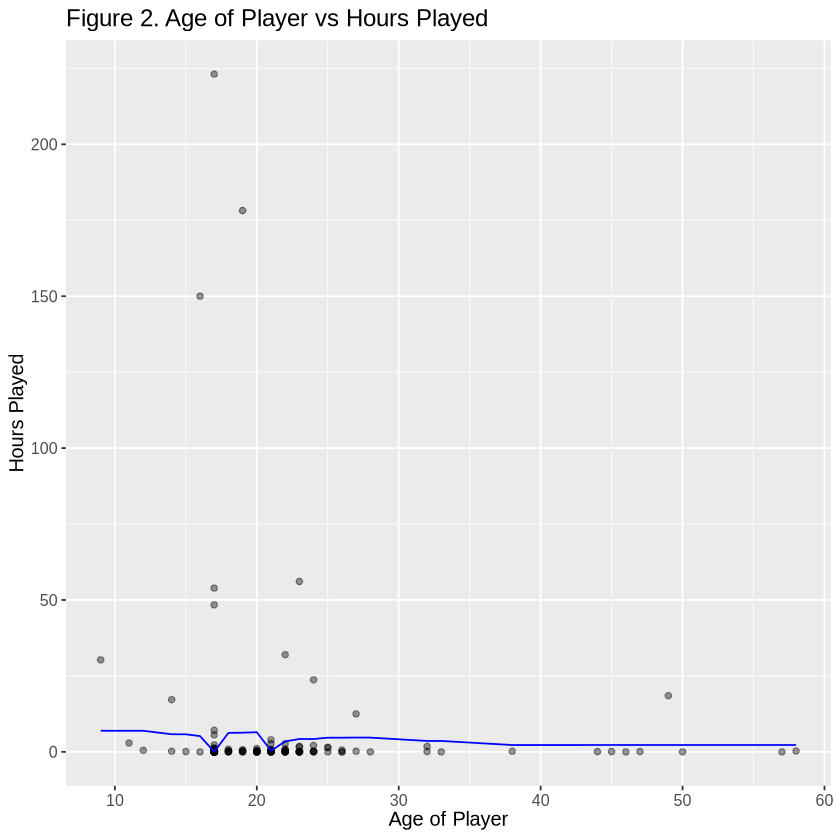

In [58]:
players_pred <- players_best_fit |>
                predict(players_train) |>
                bind_cols(players_train)

players_plot <- ggplot(players_pred, aes(x = Age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            geom_line(aes(y= .pred), color = "blue") + 
            xlab("Age of Player") +
            ylab("Hours Played") + 
            ggtitle("Figure 2. Age of Player vs Hours Played") +
            theme(text = element_text(size = 12))

players_plot

empty cell

## (2.2) Examining if experience level affects total hours played

To investigate if a player's experience level can predict the total hours played by the player, we used the KNN regression method.

We first created a visualization of `experience` and `played_hours`. A boxplot was used to explore the relationship between experience level and hours played, with `experience` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends.

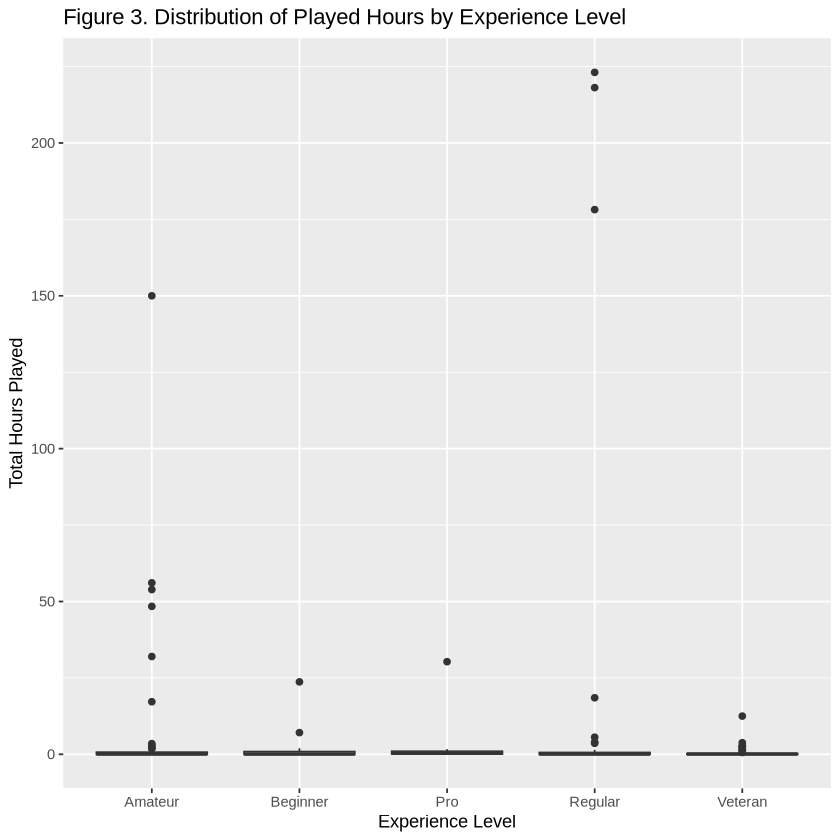

In [12]:
ggplot(players_clean, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(y = "Total Hours Played",
       x = "Experience Level",
       title = "Figure 3. Distribution of Played Hours by Experience Level")

In Figure 3, this boxplot shows that Regular and Amateur players tend to play more hours on average than Veteran, Pro, or Beginner players. This plot also allows us to identify which experience levels contain outliers with unusually high playtime.

Since many extreme outliers were observed, we chose to use KNN regression instead of linear regression. Linear regression fits a single best-fit line, which can be heavily influenced by outliers, potentially skewing predictions. On the other hand, KNN regression predicts based on the nearest neighbours, so it is less sensitive to extreme values and better captures the local patterns in the data.

To apply the KNN regression method, we performed the following:

In [13]:
set.seed(123)

# Split the data 75:25

players_split_2 <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_train_2 <- training(players_split_2)
players_test_2  <- testing(players_split_2)

# Specify the KNN model
players_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Create the recipe and convert experience to numeric values with dummy variables

players_recipe_xp <- recipe(played_hours ~ experience, data = players_train_2) |>
  step_dummy(experience, one_hot = TRUE) |>  # create all dummy columns
  step_center(all_predictors()) |>           # center numeric predictors (dummy columns)
  step_scale(all_predictors()) 

players_recipe_prep <- prep(players_recipe_xp)
players_train_processed <- bake(players_recipe_prep, new_data = players_train_2)
head(players_train_processed)

# Cross validation
players_vfold_2 <- vfold_cv(players_train_2, v = 5, strata = played_hours)

# Create the workflow
players_wkflw_2 <- workflow() |>
  add_recipe(players_recipe_2) |>
  add_model(players_spec_2)

players_wkflw_2

played_hours,experience_Amateur,experience_Beginner,experience_Pro,experience_Regular,experience_Veteran
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0,-0.7010226,-0.4766923,-0.2712254,2.2376096,-0.5727106
0.0,1.4166498,-0.4766923,-0.2712254,-0.4438234,-0.5727106
0.1,1.4166498,-0.4766923,-0.2712254,-0.4438234,-0.5727106
0.0,-0.7010226,-0.4766923,-0.2712254,-0.4438234,1.7340405
0.0,-0.7010226,-0.4766923,3.6615429,-0.4438234,-0.5727106
0.0,-0.7010226,-0.4766923,-0.2712254,-0.4438234,1.7340405


ERROR: Error in eval(expr, envir, enclos): object 'players_recipe_2' not found


In [ ]:
# To find optimal K
set.seed(123) 

kvals <- tibble(neighbors = seq(from = 1, to = 25, by = 2))
players_results_xp <- players_wkflw_2 |>
 tune_grid(resamples = players_vfold_2, grid = kvals) |>
 collect_metrics()
head(players_results_xp)

players_min_xp <- players_results_xp |>
 filter(.metric == "rmse") |>
slice_min(order_by = mean, n=1)
players_min_xp

The smallest RMPSE appears when K = 13

In [ ]:
#  Evaluating the RMSPE on the test set

k_min_xp <- players_min_xp |> pull(neighbors)

players_best_spec_xp <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_xp) |>
 set_engine("kknn") |>
 set_mode("regression")

players_best_fit_xp <- workflow() |>
 add_recipe(players_recipe_2) |>
 add_model(players_best_spec_xp) |>
 fit(data = players_train_2)

players_summary_xp <- players_best_fit_xp |>
 predict(players_test_2) |>
 bind_cols(players_test_2) |>
 metrics(truth = played_hours, estimate = .pred)
players_summary_xp

figure out how to make regression graph.... - vanessa 

In [ ]:
# Distribution of hours played
ggplot(players_clean, aes(x=played_hours))+
geom_histogram(binwidth=30)+
labs(x="Hours Played",
     y="Count",
     title="Distribution of Hours Played")

## (3) Discussion

Based on our exploratory analyses, we do see a relationship between experience level and the total hours players spend on the PLAIcraft server, but it is not as simple as “more experience → more time”. Regular and Amateur players actually show the highest average played hours, while Pro and Veteran players contribute far fewer hours than we would have expected from “expert” players. One possible explanation is that highly experienced players log in with more specific goals and play more efficiently, whereas mid-level players may spend longer exploring and experimenting in the world.

The boxplot of played_hours by experience level (Figure 3) shows a very uneven pattern: most players log relatively few hours, but there are a handful of extremely high-hour outliers (over 200 hours). These outliers are likely genuine heavy users rather than data errors, but they make group means harder to interpret. All experience groups also show large variation, so experience alone is not a very stable predictor of how much a player will actually play.

For age, we did not see a strong or clear trend. Most players in this PLAIcraft sample are between 10 and 25 years old, and differences in played hours across ages are small. Some age values are missing, and the overall sample size is modest, so we are cautious about drawing strong conclusions about age and engagement.

Finally, there are several limitations. Experience is self-reported and may not perfectly match actual skill or play style. Some experience groups, especially Pro, have relatively few players, which makes comparisons noisy. We also do not know the exact time window over which these hours were accumulated, so what counts as “a lot” of playtime might depend on the unseen time frame. Overall, our findings suggest that experience level is related to engagement on the PLAIcraft server, but not in a straightforward linear way.


## (4) Reflection Section

Working on this project gave our group a chance to apply the tools we learned in DSCI 100 to a real dataset from the PLAIcraft server. Throughout the process, we became more comfortable cleaning data, exploring variables, and communicating results in a clear and reproducible way. One of the most valuable parts of the project was learning how to organize code and written explanations so the analysis flows naturally from the question to the conclusions.

As a team, we divided the work based on each person’s strengths. Some members focused on wrangling and summarizing the data, while others handled visualizations or writing up the narrative sections. This collaboration helped us catch mistakes, compare ideas, and make sure the final product represented a shared understanding rather than one person’s perspective. Communicating constantly—double-checking assumptions, revisiting earlier steps, and revising plots—helped us produce more reliable results.

We also learned the importance of interpreting data carefully. While our initial expectations suggested that more experienced players would play more hours, our analysis showed a more complicated pattern. This reminded us that data does not always align with intuition, and that exploring distributions, outliers, and variable definitions is essential before forming conclusions.

Finally, working with a real dataset came with challenges—missing values, skewed distributions, and uneven group sizes. These issues pushed us to think critically about model assumptions and what kinds of claims we could confidently make. Overall, this project strengthened our ability to work collaboratively, think statistically, and communicate findings in a way that is accurate but approachable.